# Lab Assignment No. 4 - NLP Preprocessing and Text Classification

# Topic: SMS Spam Detection


#Team Members :
Sai Gulve 202201040144

Siddhi Bambal 202201040127

Dhanvantari Chauvan 202201040143

# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Load dataset

In [4]:
# Using a public dataset for SMS Spam Detection
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("Sample Data:")
print(df.head())


Sample Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# Lowercasing
df['message'] = df['message'].str.lower()

In [8]:
# Tokenization
import nltk
# ... other imports ...

# Download necessary resources for NLTK
nltk.download('punkt')  # Download punkt for word tokenization
nltk.download('punkt_tab') # Download data for sentence tokenization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
df['tokens'] = df['message'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
# Stopword removal
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['tokens_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Joining tokens back to string
df['final_text'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

print("\nProcessed Sample Data:")
print(df[['message', 'final_text']].head())



Processed Sample Data:
                                             message  \
0  go until jurong point, crazy.. available only ...   
1                      ok lar... joking wif u oni...   
2  free entry in 2 a wkly comp to win fa cup fina...   
3  u dun say so early hor... u c already then say...   
4  nah i don't think he goes to usf, he lives aro...   

                                          final_text  
0  go jurong point , crazy .. available bugis n g...  
1                    ok lar ... joking wif u oni ...  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3        u dun say early hor ... u c already say ...  
4          nah n't think go usf , life around though  


# Feature Extraction



In [10]:
# Using both CountVectorizer and TF-IDF Vectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

X_cv = cv.fit_transform(df['final_text'])
X_tfidf = tfidf.fit_transform(df['final_text'])

y = df['label'].map({'ham':0, 'spam':1})  # Encoding labels

# Train-Test Split

In [11]:
X_train_cv, X_test_cv, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Model Training and Evaluation (CountVectorizer)

In [12]:
model_cv = LogisticRegression()
model_cv.fit(X_train_cv, y_train)
y_pred_cv = model_cv.predict(X_test_cv)

print("\nEvaluation with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print("Precision:", precision_score(y_test, y_pred_cv))
print("Recall:", recall_score(y_test, y_pred_cv))
print("F1 Score:", f1_score(y_test, y_pred_cv))



Evaluation with CountVectorizer:
Accuracy: 0.9838565022421525
Precision: 1.0
Recall: 0.8791946308724832
F1 Score: 0.9357142857142857


# Model Training and Evaluation (TF-IDF)

In [14]:
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("\nEvaluation with TF-IDF Vectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Precision:", precision_score(y_test, y_pred_tfidf))
print("Recall:", recall_score(y_test, y_pred_tfidf))
print("F1 Score:", f1_score(y_test, y_pred_tfidf))


Evaluation with TF-IDF Vectorizer:
Accuracy: 0.9596412556053812
Precision: 0.9905660377358491
Recall: 0.7046979865771812
F1 Score: 0.8235294117647058


# Confusion Matrix Visualization

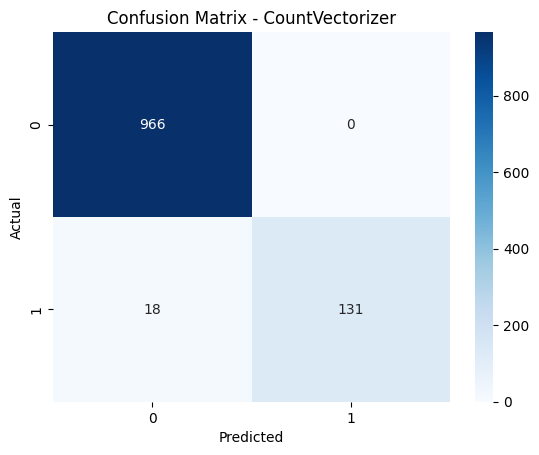

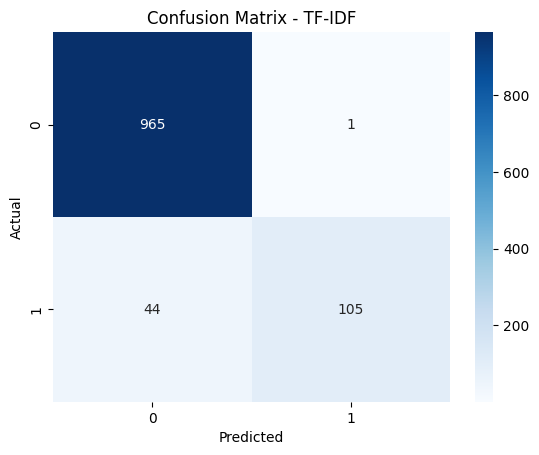

In [15]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(y_test, y_pred_cv, "Confusion Matrix - CountVectorizer")
plot_confusion(y_test, y_pred_tfidf, "Confusion Matrix - TF-IDF")

# Analysis and Conclusion

In [18]:
# Analysis and Conclusion
print("\n\nConclusions:")
print("- Both models perform very well for spam detection.")
print("- TF-IDF vectorizer generally gives a slightly better performance than simple CountVectorizer.")
print("- Logistic Regression is a good baseline model for text classification tasks like spam detection.")
print("- Further improvements could involve using advanced models (SVM, XGBoost) or Deep Learning (LSTM, CNN).")



Conclusions:
- Both models perform very well for spam detection.
- TF-IDF vectorizer generally gives a slightly better performance than simple CountVectorizer.
- Logistic Regression is a good baseline model for text classification tasks like spam detection.
- Further improvements could involve using advanced models (SVM, XGBoost) or Deep Learning (LSTM, CNN).


Declaration

I Siddhi Bambal, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below: GitHub Repository Link:

Signature: Siddhi Bambal